### Skip-Gram 모델 구현

In [1]:
from mynlp import preprocess, create_contexts_target, convert_one_hot
from nn_layers import MatMul, SoftmaxWithLoss, Adam, SGD, Trainer
import numpy as np

# contexts와 target을 구하는 함수 : mynlp.py에 추가해 놓는다
# convert_one_hot 원핫 변환 함수 : mynlp.py 에 추가해 놓는다
# Trainer 클래스  : nn_layers에 추가해 놓는다

In [2]:
class SimpleSkipGram:
    def __init__(self,vocab_size, hidden_size): # vocab_size=7,hidden_size5
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01*np.random.randn(V,H).astype('f') # (7,5)
        W_out = 0.01*np.random.randn(H,V).astype('f') # (5,7)
        
        # 계층 생성
        self.in_layer = MatMul(W_in)         # (6,7)*(7,5) = (6,5)
        self.out_layer = MatMul(W_out)       # (6,5)*(5,7) = (6,7)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [],[]
        for layer in layers : # 2회
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수 단어의 분산 표현을 저장한다.    
        self.word_vec = W_in 
        
    def predict(self, target):  # target: 입력값
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        return s
        
    def forward(self, contexts, target):  # contexts : 실제값  (6,2,7) 3차원, target: 입력값
        h = self.in_layer.forward(target)  # (6,5)
        s = self.out_layer.forward(h)      # (6,7)
        l1 = self.loss_layer1.forward(s,contexts[:,0])
        l2 = self.loss_layer2.forward(s,contexts[:,1])
        loss = l1 + l2
        return loss
    
    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

## 학습 코드 구현

In [3]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.' 
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts,target = create_contexts_target(corpus,window_size)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(contexts,contexts.shape)
print(target,target.shape)

# 중앙의 단어(타깃)으로부터 주변의 여러 단어(맥락)를 예측한다

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [4]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model,optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 2.70
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 2.83
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 2.55
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 2.61
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 2.67
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 2.75
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 2.39
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 2.66
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 2.65
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 2.59
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 2.66
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 2.65
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 2.63
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 238 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 239 |  반복 1 / 2 | 시간 0[s] | 손실 2.76
| 에폭 240 |  반복 1 / 2 | 시간 0[s] | 손실 2.63
| 에폭 241 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 242 |  반복 1

| 에폭 458 |  반복 1 / 2 | 시간 0[s] | 손실 2.24
| 에폭 459 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 460 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 461 |  반복 1 / 2 | 시간 0[s] | 손실 1.91
| 에폭 462 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 463 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 464 |  반복 1 / 2 | 시간 0[s] | 손실 1.67
| 에폭 465 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 466 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 467 |  반복 1 / 2 | 시간 0[s] | 손실 1.88
| 에폭 468 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 469 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 470 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 471 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 472 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 473 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 474 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 475 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 476 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 477 |  반복 1 / 2 | 시간 0[s] | 손실 2.44
| 에폭 478 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 479 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 480 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 481 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 482 |  반복 1

| 에폭 724 |  반복 1 / 2 | 시간 1[s] | 손실 1.70
| 에폭 725 |  반복 1 / 2 | 시간 1[s] | 손실 2.14
| 에폭 726 |  반복 1 / 2 | 시간 1[s] | 손실 1.70
| 에폭 727 |  반복 1 / 2 | 시간 1[s] | 손실 1.92
| 에폭 728 |  반복 1 / 2 | 시간 1[s] | 손실 2.14
| 에폭 729 |  반복 1 / 2 | 시간 1[s] | 손실 1.94
| 에폭 730 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 731 |  반복 1 / 2 | 시간 1[s] | 손실 1.71
| 에폭 732 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 733 |  반복 1 / 2 | 시간 1[s] | 손실 1.70
| 에폭 734 |  반복 1 / 2 | 시간 1[s] | 손실 2.16
| 에폭 735 |  반복 1 / 2 | 시간 1[s] | 손실 1.92
| 에폭 736 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 737 |  반복 1 / 2 | 시간 1[s] | 손실 1.70
| 에폭 738 |  반복 1 / 2 | 시간 1[s] | 손실 1.93
| 에폭 739 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 740 |  반복 1 / 2 | 시간 1[s] | 손실 1.70
| 에폭 741 |  반복 1 / 2 | 시간 1[s] | 손실 1.93
| 에폭 742 |  반복 1 / 2 | 시간 1[s] | 손실 2.14
| 에폭 743 |  반복 1 / 2 | 시간 1[s] | 손실 1.92
| 에폭 744 |  반복 1 / 2 | 시간 1[s] | 손실 2.14
| 에폭 745 |  반복 1 / 2 | 시간 1[s] | 손실 1.49
| 에폭 746 |  반복 1 / 2 | 시간 1[s] | 손실 2.36
| 에폭 747 |  반복 1 / 2 | 시간 1[s] | 손실 1.68
| 에폭 748 |  반복 1

| 에폭 974 |  반복 1 / 2 | 시간 1[s] | 손실 2.11
| 에폭 975 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 976 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 977 |  반복 1 / 2 | 시간 1[s] | 손실 2.11
| 에폭 978 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 979 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 980 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 981 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 982 |  반복 1 / 2 | 시간 1[s] | 손실 1.65
| 에폭 983 |  반복 1 / 2 | 시간 1[s] | 손실 2.11
| 에폭 984 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 985 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 986 |  반복 1 / 2 | 시간 1[s] | 손실 2.11
| 에폭 987 |  반복 1 / 2 | 시간 1[s] | 손실 1.87
| 에폭 988 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 989 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 990 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 991 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 992 |  반복 1 / 2 | 시간 1[s] | 손실 2.10
| 에폭 993 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 994 |  반복 1 / 2 | 시간 1[s] | 손실 2.11
| 에폭 995 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 996 |  반복 1 / 2 | 시간 1[s] | 손실 1.65
| 에폭 997 |  반복 1 / 2 | 시간 1[s] | 손실 2.34
| 에폭 998 |  반복 1

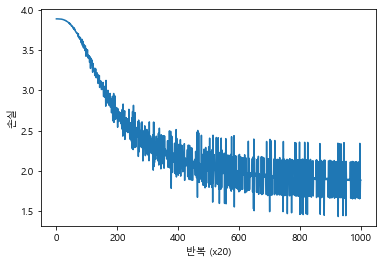

In [5]:
trainer.plot()

In [6]:
# W_in : 인스턴스 변수인 단어의 분산 표현
word_vecs = model.word_vec # (7,5)

for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

       you :  [ 0.00759328 -0.00981845  0.00928727 -0.0022961  -0.01598616]
       say :  [-0.6448699   1.068561    0.80960137 -0.8489516   0.8369982 ]
   goodbye :  [-1.0881463  -0.850126   -0.7946473   0.80017203 -0.7971007 ]
       and :  [ 1.3373525   0.7071414   1.0167254  -0.99438655  0.976777  ]
         i :  [-1.080663   -0.831425   -0.8176715   0.78847444 -0.79084396]
     hello :  [ 1.4333974  -0.91162825 -0.8751797   0.86241007 -0.8658566 ]
         . :  [-0.00194225  0.00650505  0.00790326 -0.01252679 -0.00650019]


### 예측과 정확도 평가

In [7]:
# 예측
h = model.predict(target)
# print(h)
print(h.shape) # (6,7)

(6, 7)


In [8]:
h = model.predict(target[0,:])  # [0, 1, 0, 0, 0, 0, 0],'say', (7,)
print(h.shape)   # (7,)
print(h)
pred0 = np.argmax(h,0)
h1 = h
h1[pred0] = 0
pred1 = np.argmax(h1,0)

c0 = np.argmax(contexts[0,0,:],0)
c1 = np.argmax(contexts[0,1,:],0)

print('contexs : ', c0,c1)
print('predict : ', pred0,pred1)

(7,)
[ 2.11272799 -4.21987172  2.14159025 -1.81330944  2.14127255  2.11116475
 -2.84445541]
contexs :  0 2
predict :  2 4


In [9]:
h = model.predict(target[1,:])  # [0, 0, 1, 0, 0, 0, 0],'goodbye', (7,)
print(h.shape)   # (7,)
print(h)
pred0 = np.argmax(h,0)
h1 = h
h1[pred0] = 0
pred1 = np.argmax(h1,0)

c0 = np.argmax(contexts[1,0,:],0)
c1 = np.argmax(contexts[1,1,:],0)

print('contexs : ', c0,c1)
print('predict : ', pred0,pred1)

(7,)
[-0.96565735  4.21843135 -3.73569957  4.21553029 -3.73225738 -0.96347895
  0.1875051 ]
contexs :  1 3
predict :  1 3


In [10]:
print(contexts, contexts.shape)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)


In [11]:
print(contexts[0,:,:])

[[1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]


In [12]:
print(target,target.shape)
print(target[0,:])

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)
[0 1 0 0 0 0 0]


In [13]:
# 정확도
def get_correct(num):
    h = model.predict(target[num,:])  
    pred0 = np.argmax(h,0)
    h1 = h
    h[pred0] = 0
    pred1 = np.argmax(h1,0)
    c0 = np.argmax(contexts[num,0,:],0) 
    c1 = np.argmax(contexts[num,1,:],0) 
    print('context : ',c0,c1)
    print('predict : ',pred0,pred1)
    print('-'*50)
    correct = 0
    if (c0==pred0)|(c0==pred1):
        correct +=1
    if (c1==pred0)|(c1==pred1):
        correct +=1
    return correct  


print('[contexts:실제값', 'predict:예측값]')

acc = 0
for k in range(target.shape[0]): # 6회
    correct = get_correct(k)
    acc += correct
print(acc)    
accuracy = acc/target.shape[0]/2       # 12로 나눔 , 10/12 = 0.8333

print('정확도 :', np.round(accuracy,4)) # 정확도가 CBOW에 비해 비교적 높음

[contexts:실제값 predict:예측값]
context :  0 2
predict :  2 4
--------------------------------------------------
context :  1 3
predict :  1 3
--------------------------------------------------
context :  2 4
predict :  2 4
--------------------------------------------------
context :  3 1
predict :  1 3
--------------------------------------------------
context :  4 5
predict :  2 4
--------------------------------------------------
context :  1 6
predict :  6 1
--------------------------------------------------
10
정확도 : 0.8333
